In [ ]:
!git clone https://github.com/estherpuyol/BHF_Python_workshop.git

fatal: destination path 'BHF_Python_workshop' already exists and is not an empty directory.


# Pandas 

The pandas package is an extremely powerful library for manipulating tabulated data. Similar in some ways to EXCEL, pandas provides functionality for reading data from spreadsheets (in a range of formats including excel, csv and pickle files); presenting them as a Dataframe object. Through this it becomes possible to search, filter and manipulate the data entries. In this notebook we will go through some of the basic functionality of Pandas, sufficient for reading in data, selecting columns and filtering by different search categories. 

We start by importing Pandas:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Reading in Data

Pandas is capable of working with data from a range of statistical software packages (EXCEL, SQL, STATA, SAS). In this course we will focus simply on reading from .csv and pickle files e.g. 

In [ ]:
student_data=pd.read_pickle('/content/BHF_Python_workshop/40subjdata.pk1') #reading from a pickle file
dHCP_volume_data=pd.read_csv('/content/BHF_Python_workshop/dHCP_volume_data.csv',header=None) # reading from a csv file

Open 'dHCP_volume_data.csv' using excel. You will note it has no column names. Thus in order to load all data correctly (and avoid the first row of data being read in as column headers) it is necessary to supplement the call to ```read_csv``` with an additional argument ```header=None```. Other potentially important read arguments include ```sep``` or ```delimeter``` which define the delimeter used to separate the columns in the saved spreadsheet. For more information see (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). 

To avoid this confusion over csv formatting it is generally better to save and then reload Dataframes as pickle files (see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html.)

## Viewing and Inspecting Data

Pandas provides several functions for viewing subsections of the DataFrame and estimating summary statistics across columns. For example it is possible to read the first (or last) few rows of the data using the ```head``` and ```tail``` functions respectively

In [ ]:
print(student_data.head(3))
print(student_data.tail(3))

  gender  distance  height
0      M        80     183
1      F         3     163
2      F        90     152
   gender  distance  height
37      M       192     171
38      M        35     184
39      M        45     179


__Task 1:__ Print first 10 and last 7 rows.

In [ ]:
print(student_data.head(10))
print(' ')
print(student_data.tail(7))

  gender  distance  height
0      M        80     183
1      F         3     163
2      F        90     152
3      F       272     157
4      F        80     157
5      F         8     165
6      M       485     173
7      M       176     180
8      F        10     164
9      F        72     160
 
   gender  distance  height
33      F        90     174
34      M        80     183
35      M       278     181
36      M       240     182
37      M       192     171
38      M        35     184
39      M        45     179


In addition several functions are provided to summarise statistics across columns e.g:

-  df.mean() Returns the mean of all columns
-  df.max()  Returns the highest value in each column
-  df.min()Returns the lowest value in each column
-  df.median()Returns the median of each column
-  df.std()Returns the standard deviation of each column
-  df.corr() Returns the correlation between columns in a data frame


## Creating Dataframes from scratch

Dataframes can be created from Dictionarys, Lists or Numpy arrays. Below shows an example of creating a new dataframe from a 4 column array, within given column names:

In [ ]:
# creating an array of random numbers with four columns
random_array=np.random.randint(0,100,size=(10,4))

# creating a new data frame object from the random array and providing column  labels
df=pd.DataFrame(random_array,index=['a','b','c','d','e','f','g' ,'h','i','j'],columns=['A','B','C','D'])

df

,A,B,C,D
a,85,91,82,24
b,17,38,86,40
c,74,45,74,70
d,70,81,72,15
e,99,86,95,59
f,87,6,94,15
g,62,5,55,61
h,87,41,72,54
i,59,55,74,2
j,79,32,82,6


__Task 2__: Create an array of 100 rows and 2 columns and populate it with normally distributed random values (_Hint_: `randn`). Create a data frame object from this array (do not provide index labels this time, only column labels).

In [ ]:
### (Task 2)
gaussian_array = np.random.randn(100,2)
df2 = pd.DataFrame(gaussian_array,index=None,columns=['A','B'])
df2.head()

,A,B
0,1.756282,0.267308
1,-0.499193,-1.891217
2,-2.540719,-0.099268
3,1.164534,0.023071
4,-1.350287,1.078044


## Adding new Columns

New columns can straightforwardly be added in the following way:

In [ ]:
df['E']=df['A']+df['B']
df

,A,B,C,D,E
a,85,91,82,24,176
b,17,38,86,40,55
c,74,45,74,70,119
d,70,81,72,15,151
e,99,86,95,59,185
f,87,6,94,15,93
g,62,5,55,61,67
h,87,41,72,54,128
i,59,55,74,2,114
j,79,32,82,6,111


Allowing you to create new columns of data from existing columns, as you would in EXCEL.

__Task 3__: Create a new column called 'F' containing: $mean(A) + 5*B$

In [ ]:
df['F']=df['A'].mean()+5*df['B']
df

,A,B,C,D,E,F
a,85,91,82,24,176,526.9
b,17,38,86,40,55,261.9
c,74,45,74,70,119,296.9
d,70,81,72,15,151,476.9
e,99,86,95,59,185,501.9
f,87,6,94,15,93,101.9
g,62,5,55,61,67,96.9
h,87,41,72,54,128,276.9
i,59,55,74,2,114,346.9
j,79,32,82,6,111,231.9


## Selecting columns and rows 

It is possible to select a single column from a DataFrame using:

In [ ]:
df['A']

print('Column object type:', type(df['A']))

Column object type: <class 'pandas.core.series.Series'>


As you can see a DataFrame column is represented by a separated datatype: a Series. Essentially a Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Rows can be selected as

In [ ]:
df[0:3]

,A,B,C,D,E,F
a,85,91,82,24,176,526.9
b,17,38,86,40,55,261.9
c,74,45,74,70,119,296.9


In order to select a range of columns and rows (using the column names and row indices) use the ```.loc``` attribute:

In [ ]:
# select a range or rows and columns by name
df.loc['a':'d','A':'C']

,A,B,C
a,85,91,82
b,17,38,86
c,74,45,74
d,70,81,72


This can also be used to obtain a single scalar value, 

In [ ]:
# select a scalar value
print('Selecting a single value: {}, given type: {}'.format(df.loc['b','A'],type(df.loc['b','A'])))

Selecting a single value: 17, given type: <class 'numpy.int64'>


Alternatively to slice by column and row number use ```iloc```:

In [ ]:
# select a range or rows and columns by number
df.iloc[0:4,0:3]

,A,B,C
a,85,91,82
b,17,38,86
c,74,45,74
d,70,81,72


__Task 4:__ From `student_data` select
1. Rows 2 to 6
2. Column 'height'
3. Rows 0 and 1 and columns 0 to 2
4. Rows 0 to 2 and columns 'distance' to 'height'

In [ ]:
student_data[2:7]

,gender,distance,height
2,F,90,152
3,F,272,157
4,F,80,157
5,F,8,165
6,M,485,173


In [ ]:
student_data['height'].head()

0    183
1    163
2    152
3    157
4    157
Name: height, dtype: int64

In [ ]:
student_data.iloc[0:2,0:3]

,gender,distance,height
0,M,80,183
1,F,3,163


In [ ]:
student_data.loc[0:2,'distance':'height']

,distance,height
0,80,183
1,3,163
2,90,152


## Filtering 

Data can be filtered using conditional statements such as:

In [ ]:
df[df['A'] > 50]

,A,B,C,D,E,F
a,85,91,82,24,176,526.9
c,74,45,74,70,119,296.9
d,70,81,72,15,151,476.9
e,99,86,95,59,185,501.9
f,87,6,94,15,93,101.9
g,62,5,55,61,67,96.9
h,87,41,72,54,128,276.9
i,59,55,74,2,114,346.9
j,79,32,82,6,111,231.9


This selects all rows for which the values in the column 'A' are greater than 50. To further reduce this data to the values in column 'C':

In [ ]:
df['C'][df['A'] > 50]

a    82
c    74
d    72
e    95
f    94
g    55
h    72
i    74
j    82
Name: C, dtype: int64

__Task 5:__ Select the column 'height' for the female students only.

In [ ]:
student_data['height'][student_data['gender']=='F']

1     163
2     152
3     157
4     157
5     165
8     164
9     160
10    166
11    157
12    168
13    167
14    156
15    155
17    169
18    171
21    168
22    165
23    166
24    164
25    163
26    161
27    157
29    163
30    157
31    169
32    177
33    174
Name: height, dtype: int64

## Iterating through rows

Occasionally it can be useful to iterate through all the rows in the DataFrame (for example if it stores paths to files that need to be processed). This can be achieved as follows:

In [ ]:
for index, row in df.iterrows():
    print(index,row['A'],row['E'])

a 85.0 176.0
b 17.0 55.0
c 74.0 119.0
d 70.0 151.0
e 99.0 185.0
f 87.0 93.0
g 62.0 67.0
h 87.0 128.0
i 59.0 114.0
j 79.0 111.0


Here, ```row``` is a Series containing the content of each indexed row. The values from different columns in this row can therefore be indexed as ```row['A'], row['B'}``` ... etc

## Merging

Sometimes you will want to merge two DataFrames that share information. For example, creating a new DataFrame that shares Columns 'A' and 'B' with ```df```:

In [ ]:
# creating an array of random numbers with four columns
random_array=np.random.randint(0,100,size=(10,3))

# creating a new data frame object from the random array and providing column  labels
df_new=pd.DataFrame(random_array,index=['a','b','c','d','e','f','g' ,'h','i','j'],columns=['F','G','H'])
df_new['A']=df['A']
df_new['B']=df['B']
df_new

,F,G,H,A,B
a,61,45,54,85,91
b,18,11,71,17,38
c,15,63,44,74,45
d,34,66,38,70,81
e,76,81,59,99,86
f,85,31,27,87,6
g,44,2,11,62,5
h,47,77,70,87,41
i,74,75,96,59,55
j,6,12,46,79,32


Then the two DataFrames can be merged on these columns using the following command:

In [ ]:
df_merged=df.merge(df_new, on=['A','B'])
df_merged

,A,B,C,D,E,F_x,F_y,G,H
0,85,91,82,24,176,526.9,61,45,54
1,17,38,86,40,55,261.9,18,11,71
2,74,45,74,70,119,296.9,15,63,44
3,70,81,72,15,151,476.9,34,66,38
4,99,86,95,59,185,501.9,76,81,59
5,87,6,94,15,93,101.9,85,31,27
6,62,5,55,61,67,96.9,44,2,11
7,87,41,72,54,128,276.9,47,77,70
8,59,55,74,2,114,346.9,74,75,96
9,79,32,82,6,111,231.9,6,12,46


## Plotting

Finally, as seen prevously for the MatplotLib tutorial. It is possible to directly plot the columns of the DataFrame as follows:

Text(0, 0.5, 'Distance Travelled')

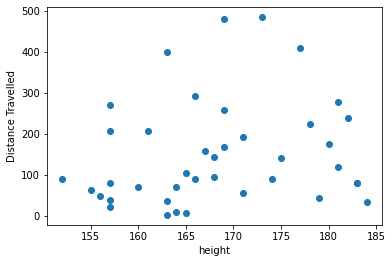

In [ ]:
plt.scatter(student_data['height'],student_data['distance'])
plt.xlabel('height')
plt.ylabel('Distance Travelled')

__Task 6:__ Plot a histogram of heights of the female students.

(array([1., 2., 5., 2., 5., 4., 5., 1., 1., 1.]),
 array([152. , 154.5, 157. , 159.5, 162. , 164.5, 167. , 169.5, 172. ,
        174.5, 177. ]),
 <a list of 10 Patch objects>)

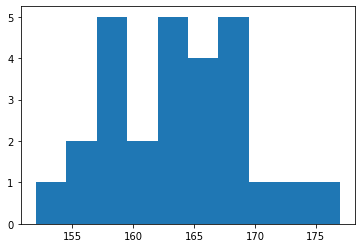

In [ ]:
plt.hist(student_data['height'][student_data['gender']=='F'])

# Citations & Extended Tutorials

When using Pandas in your research you should consider citing

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) (publisher link)

For more comprehensive tutorials on using Pandas see:

https://pandas.pydata.org/pandas-docs/stable/tutorials.html